## [1]AMMONITE REPL
- 기본 REPL 보다 좋고, 스칼라 스트립트를 지원함
- brew install ammonite-repl

## [2]Class 정의하기, Class를 이용해 Object 만들기

In [2]:
class Person{
    val firstName = "Martin"
    val lastName = "Odersky"
    def name = firstName + "" + lastName
}

Person //Object와 다르게 Class 정의만으로 만들 수 없다.


cmd2.sc:7: not found: value Person
val res2_1 = Person //Object와 다르게 Class 정의만으로 만들 수 없다.
             ^

: 

In [23]:
object obj_Person{
    
}
obj_Person //object는 정의만으로 만들 수 있다.

defined object obj_Person
res22_1: wrapper.wrapper.obj_Person.type = $sess.cmd22Wrapper$Helper$obj_Person$@4fb38e29

In [4]:
val martin = new Person
val martin2 = new Person

martin.firstName

martin: Person = $sess.cmd0Wrapper$Helper$Person@44a0209f
martin2: Person = $sess.cmd0Wrapper$Helper$Person@53b41917
res3_2: String = "Martin"

In [8]:
object greeter{
    def greet(p: Person) = "Greeting," + p.firstName + " " + p.lastName
}

defined object greeter

In [9]:
greeter.greet(martin)
greeter.greet(martin2)

res8_0: String = "Greeting,Martin Odersky"
res8_1: String = "Greeting,Martin Odersky"

## [3]기본 생성자(CONSTRUCTOR)
- 클래스에서 val 선언시 바로 필드가 된다.(자바에서는 모두 구현해야 하는데)

In [10]:
//기본 버전
class Person(first: String, last: String){
    val firstName = first
    val lastName = last
    def name = firstName + " " + lastName
}

val seungha = new Person("Seungha", "Lee")

seungha.name

defined class Person
seungha: wrapper.wrapper.Person = $sess.cmd9Wrapper$Helper$Person@2d86ed41
res9_2: String = "Seungha Lee"

In [25]:
//더 축약 버전
class Person(val firstName: String, val lastName: String){
    def name = firstName + " " + lastName
}

val seungha1 = new Person("Seungha1", "LEE")

seungha1.name

defined class Person
seungha1: wrapper.wrapper.Person = $sess.cmd24Wrapper$Helper$Person@f57eb1b
res24_2: String = "Seungha1 LEE"

### (1) keyword parameter & default parameter values
- default 파라미터의 경우 가장 마지막에 넣자. ex) "!"

In [21]:
//lastName에 디폴트 값을 주자
class Person(val firstName: String, val lastName: String = "!"){
    def name = firstName + " " + lastName
}

val seungha2 = new Person("Seungha2", "LEE")
val seungha3 = new Person("Seingha3") //두번째 인자값을 넣지 않음


new Person(lastName ="LAST", firstName = "First").name
//res값.name 해도 같은 결과값

new Person("Seungha").name

seungha2.name
seungha3.name //결과 값을 보자. 인자를 넘기지 않으니 디폴트 값이 들어갔다.

defined class Person
seungha2: wrapper.wrapper.Person = $sess.cmd20Wrapper$Helper$Person@631825f6
seungha3: wrapper.wrapper.Person = $sess.cmd20Wrapper$Helper$Person@1c28a7b2
res20_3: String = "First LAST"
res20_4: String = "Seungha !"
res20_5: String = "Seungha2 LEE"
res20_6: String = "Seingha3 !"

## [4]apply
- apply 메소드를 사용하면 클래스나 객체의 용도가 주로 하나만 있는 경우를 편하게 표현할 수 있다.

In [1]:
class Adder(amount: Int){
    def apply(in: Int): Int = in + amount
}

defined class Adder

In [8]:
val add3 = new Adder(3) // 3을 인자로 받은 add3가 생성

cmd8.sc:2: missing argument list for method apply in class Adder
Unapplied methods are only converted to functions when a function type is expected.
You can make this conversion explicit by writing `apply _` or `apply(_)` instead of `apply`.
val res8_1 = add3.apply
                  ^

: 

In [5]:
//apply(예약어임)로 인해서, 즉 생성자 이후에 인자로 던지는 (2) 값이 apply에 적용
add3(2)

res4: Int = 5

In [9]:
class Avengers(val realName: String, val position: String)

val CaptainAmerica = new Avengers("Steve Rogers", "Leader")
val IronMan = new Avengers("Tony Stark", "Range Deler")
val Hulk = new Avengers("Bruce Banner", "Tanker")
val Thor = new Avengers("Thor Odinson", "GOD")

defined class Avengers
CaptainAmerica: Avengers = $sess.cmd8Wrapper$Helper$Avengers@7c186704
IronMan: Avengers = $sess.cmd8Wrapper$Helper$Avengers@3211e907
Hulk: Avengers = $sess.cmd8Wrapper$Helper$Avengers@17edd243
Thor: Avengers = $sess.cmd8Wrapper$Helper$Avengers@1f0c5174

In [15]:
class GodCheck{
    def inspect(avengers: Avengers): String
    = if(avengers.position.toLowerCase == "god") "God!"
        else "Mere mortal"
}

defined class GodCheck

In [21]:
println(GodCheck.inspect(IronMan))
println(GodCheck.inspect(Thor))
println(GodCheck.inspect(IronMan)== "God!")
println(GodCheck.inspect(Thor)== "God!")

Mere mortal
God!
false
true


## [5]Scala Type Hierarchy
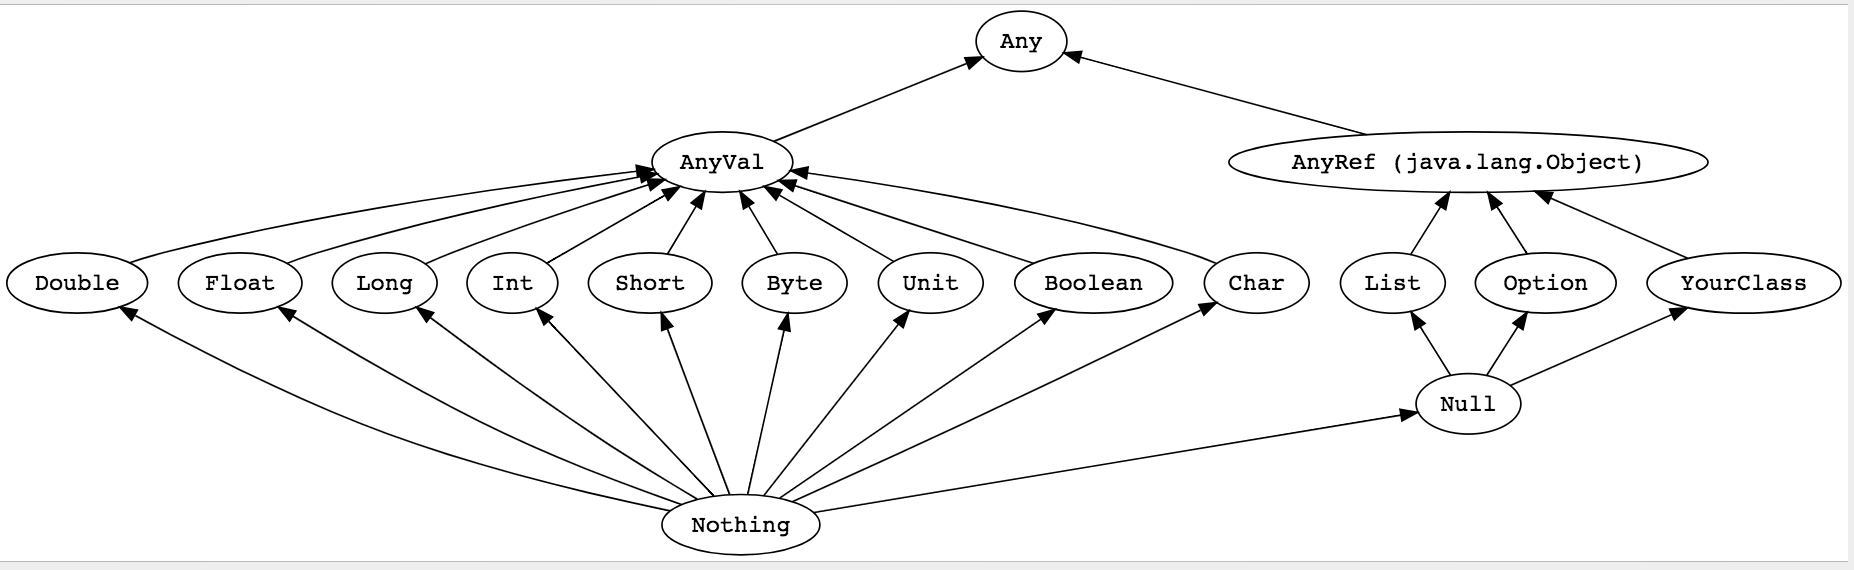

- Nothing은 모든 타입들의 하위 타입이다
- Null은 List, Option Class의 하위 타입이며, Scala에서는 사용을 지양한다

## [6]Companion Objects

In [24]:
class Timestamp(val seconds: Long)

object Timestamp{
    def apply(hour: Int, minutes: Int, second: Int): Timestamp =
        new Timestamp(hour*60*60 + minutes*60 + second)
}

//Timestamp 객체가 만들어졌고, (1,1,1)이 예약메소드인 apply에 들어가고 객체가 만들어지면서 계산되고,
//Timestamp 클래스로 반환되면서 seconds호출되면서 값이 Long으로 나옴
Timestamp(1,1,1).seconds

defined class Timestamp
defined object Timestamp
res23_2: Long = 3661L

In [25]:
val t = Timestamp(1,1,1)
t.seconds

t: Timestamp = $sess.cmd23Wrapper$Helper$Timestamp@7de57865
res24_1: Long = 3661L

In [26]:
val t2 = new Timestamp(3662)
t2.seconds

t2: Timestamp = $sess.cmd23Wrapper$Helper$Timestamp@238ce361
res25_1: Long = 3662L

In [29]:
//번외
object Times{
    
}
class Times1{
    
}

val obj_Times = Times // new (X)
val cls_Times1 = new Times1 // new


defined object Times
defined class Times1
obj_Times: wrapper.wrapper.Times.type = $sess.cmd28Wrapper$Helper$Times$@70a09aca
cls_Times1: wrapper.wrapper.Times1 = $sess.cmd28Wrapper$Helper$Times1@1ce4771e

## [7]Case Classes
- 기본적으로 불변
- 패턴 매칭을 통해 분해가능
- 레퍼런스가 아닌 구조적인 동등성으로 비교됨
- 초기화와 운영이 간결함

In [3]:
case class Person(firstName: String, lastName: String){
    def name = firstName + " " + lastName
}

val martin = new Person("Martin", "Ordersky")
val martin1 = Person("Martin1", "Ordersky1")

defined class Person
martin: wrapper.wrapper.Person = Person("Martin", "Ordersky")
martin1: wrapper.wrapper.Person = Person("Martin1", "Ordersky1")

- case class를 인스턴스화 할 때 new 키워드는 필요없다.

### Feature 1) FIELD FOR EACH CONSTRUCTOR ARGUMENT

In [4]:
martin.name

res3: String = "Martin Ordersky"

### Feature  2) DEFAULT TOSTRING METHOD

In [5]:
martin

res4: Person = Person("Martin", "Ordersky")

### Feature 3) DEFAULT EQUALS, HASHCODE METHOD

In [37]:
val martinEQ1 = Person("MartinEQ", "OderskyEQ")
val martinEQ2 = Person("MartinEQ", "OderskyEQ")

//해시코드 toString 값이 같다는 것을 알 수 있음
martinEQ1 == martinEQ2 // 보통 자바에서 타입지정자 비교시 쓰는  ==
martinEQ1 equals martinEQ2 // 보통 자바에서 인스턴스 비교시 쓰는 object 메소드인 equals



// Below is class(Not case class)

class Person2(firstName: String, lastName: String){
    def name = firstName + " " + lastName
}

val martinclass1 = new Person2("Martinclass", "Oderskyclass")
val martinclass2 = new Person2("Martinclass", "Oderskyclass")

martinclass1 == martinclass2
martinclass1 equals martinclass2

martinEQ1: Person = Person("MartinEQ", "OderskyEQ")
martinEQ2: Person = Person("MartinEQ", "OderskyEQ")
res36_2: Boolean = true
res36_3: Boolean = true
defined class Person2
martinclass1: wrapper.wrapper.Person2 = $sess.cmd36Wrapper$Helper$Person2@2890dd13
martinclass2: wrapper.wrapper.Person2 = $sess.cmd36Wrapper$Helper$Person2@209c23e5
res36_7: Boolean = false
res36_8: Boolean = false

### Feature 4) A COPY METHOD


In [20]:
/*
case class Person(firstName: String, lastName: String){
    def name = firstName + " " + lastName
}
val martin = new Person("Martin", "Ordersky")
*/
martin
martin.copy(firstName = "Martin2")
martin.copy(lastName = "Odersky2")
val copymartin = martin.copy(firstName = "Martin3")

res19_0: Person = Person("Martin", "Ordersky")
res19_1: Person = Person("Martin2", "Ordersky")
res19_2: Person = Person("Martin", "Odersky2")
copymartin: Person = Person("Martin3", "Ordersky")

### Feature 5) EXTENSIBILITY
 - Class can extend another class.
 - Case class can not extend another case class 

### Case classes example

In [29]:
abstract class Notification

case class Email(sourceEmail: String, title: String, body: String)
extends Notification

case class SMS(sourceNumber: String, message: String) extends Notification

case class VoiceRecording(contactName: String, link: String) extends Notification

defined class Notification
defined class Email
defined class SMS
defined class VoiceRecording

In [26]:
// case class를 인스턴트화
val emailFromJohn = Email("jone.email.com", "Greeting From John", "Hello World!")

emailFromJohn: Email = Email("jone.email.com", "Greeting From John", "Hello World!")

In [28]:
// case class의 생성자 파라미터는 public 값이며 직접 접근이 가능하다
val title = emailFromJohn.title //인스턴스화 객체의 생성자 중 두번째 인자인 title의 값에 직접접근해서 val title에 저장
println(title)

Greeting From John


title: String = "Greeting From John"

In [29]:
// case class의 필드는 직접 수정할 수 없다. 컴파일시 에러가 남.
// case class의 필드는 기본적으로 val이다. 그러므로 다른 값을 할당 할 수 없다.
emailFromJohn.title = "change title"


cmd29.sc:1: reassignment to val
val res29 = emailFromJohn.title = "change title"
                                ^

: 

In [31]:
// case class의 copy 메서드를 통해서 필드를 대체할 수 있다.
val editedEmail = emailFromJohn.copy(title="I am learning Scala", body ="It's really hard")
println(editedEmail)

// title과 body값이 바뀜. 변경된 필드값을 가진 ediredEmail 이라는 객체가 생성되었다.

Email(jone.email.com,I am learning Scala,It's really hard)


editedEmail: wrapper.cmd25.cmd24.wrapper.Email = Email("jone.email.com", "I am learning Scala", "It's really hard")

## [8]Pattern Matching

In [38]:
case class Person(firstName: String, lastName: String)

defined class Person

In [39]:
object Stomrooper{
    def inspect(person: Person):String = person match {
        case Person("Luke", "Skywalker") => "Stop, rebel scum!"
        case Person("Han", "Solo") => "Stop, rebel scum!"
        case Person(first, last) => s"Move along, $first"
    }
}

defined object Stomrooper

In [42]:
Stomrooper.inspect(Person("Martin", "Odersky"))
Stomrooper.inspect(Person("Luke", "Skywalker"))

res41_0: String = "Move along, Martin"
res41_1: String = "Stop, rebel scum!"

## Pattern Matching Example

In [43]:
case class Avengers(realName: String, position: String)

val CaptainAmerica = Avengers("Steve Rogers", "Leader")
val IronMan = Avengers("Tony Stark", "Range Deler")
val Hulk = Avengers("Bruce Banner", "Tanker")
val Thor = Avengers("Thor Odinson", "God")

defined class Avengers
CaptainAmerica: Avengers = Avengers("Steve Rogers", "Leader")
IronMan: Avengers = Avengers("Tony Stark", "Range Deler")
Hulk: Avengers = Avengers("Bruce Banner", "Tanker")
Thor: Avengers = Avengers("Thor Odinson", "God")

In [44]:
object GodFollower {
    def inspect(avenger: Avengers): String = avenger match{
        case Avengers(_, "God") => "Oh my god"
        case _ => "Mere mortal"
    }
}

defined object GodFollower

In [46]:
println(GodFollower.inspect(CaptainAmerica))
println(GodFollower.inspect(Thor))

Mere mortal
Oh my god


In [49]:
case class Music(title: String, author: Author)
case class Author(firstName: String, lastName: String)

defined class Music
defined class Author

In [55]:
object MusicPlayer {
    def play(music: Music): String = music match{
        case Music(title, Author(_, "Mozart")) => s"$title by Mozart"
        case Music(t, Author(f, s)) => s"$t by $f $s"
    }
}

defined object MusicPlayer

In [59]:
val Music1 = Music("Requim", Author("Wolfgang Amodeus", "Mozart"))
println(MusicPlayer.play(Music1))

val Music2 = Music("애국가", Author("익태", "안"))
println(MusicPlayer.play(Music2))

Requim by Mozart
애국가 by 익태 안


Music1: Music = Music(Requim,Author(Wolfgang Amodeus,Mozart))
Music2: Music = Music(애국가,Author(익태,안))